In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_soe = pd.read_csv('resume_list_sofe.csv')

In [3]:
df_soe["Category"] = "Software Engineer"
df_soe.to_csv("resume_list_cs.csv", index=False)

In [4]:
df_soe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_title  100 non-null    object
 1   resume     100 non-null    object
 2   Category   100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [5]:
print ("Displaying the distinct categories of resume:\n\n ")
print (df_soe['job_title'].unique())

Displaying the distinct categories of resume:

 
['Senior software engineer' 'Software/Hardware Engineer'
 'Software Engineer' 'Software Developer Engineer'
 'Senior Software Engineer' 'Engineer Software'
 'software engineer & care taker'
 'Software Engineer/Manager/PHP Developer'
 'Software Development Engineer in Test' 'Junior Software Engineer'
 'Software engineer, data analysis, data science'
 'QA Analyst Sr Software Test Engineer - Client Support Services'
 'Industrial Engineer Software Developer'
 'IT industry as Software Test Engineer &amp Quality Analyst'
 'Technical/Software Support Engineer'
 'Software Engineer, Full Stack - Python, Javascript, React'
 'Component Engineer Software Analyst'
 'Sr. Software Development Engineer in Testing'
 'Senior iOS Software Engineer' 'Senior Software ETL test engineer'
 'software engineer' 'Environmental Engineer Software Project'
 'Software Test Validation Engineer' 'Software Automation Test Engineer'
 'Senior Software QA Engineer'
 'Softwa

In [6]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (df_soe['job_title'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Software Engineer                                                        27
Engineer Software                                                        10
Software QA Engineer                                                      5
Senior Software Engineer                                                  3
Junior Software Engineer                                                  3
Software Developer Engineer                                               3
Software Development Engineer in Test                                     3
Software Quality Assurance Engineer                                       2
software engineer                                                         2
Software Test Engineer                                                    2
jr software engineer                                                      1
Software Engineer Application Developer                        

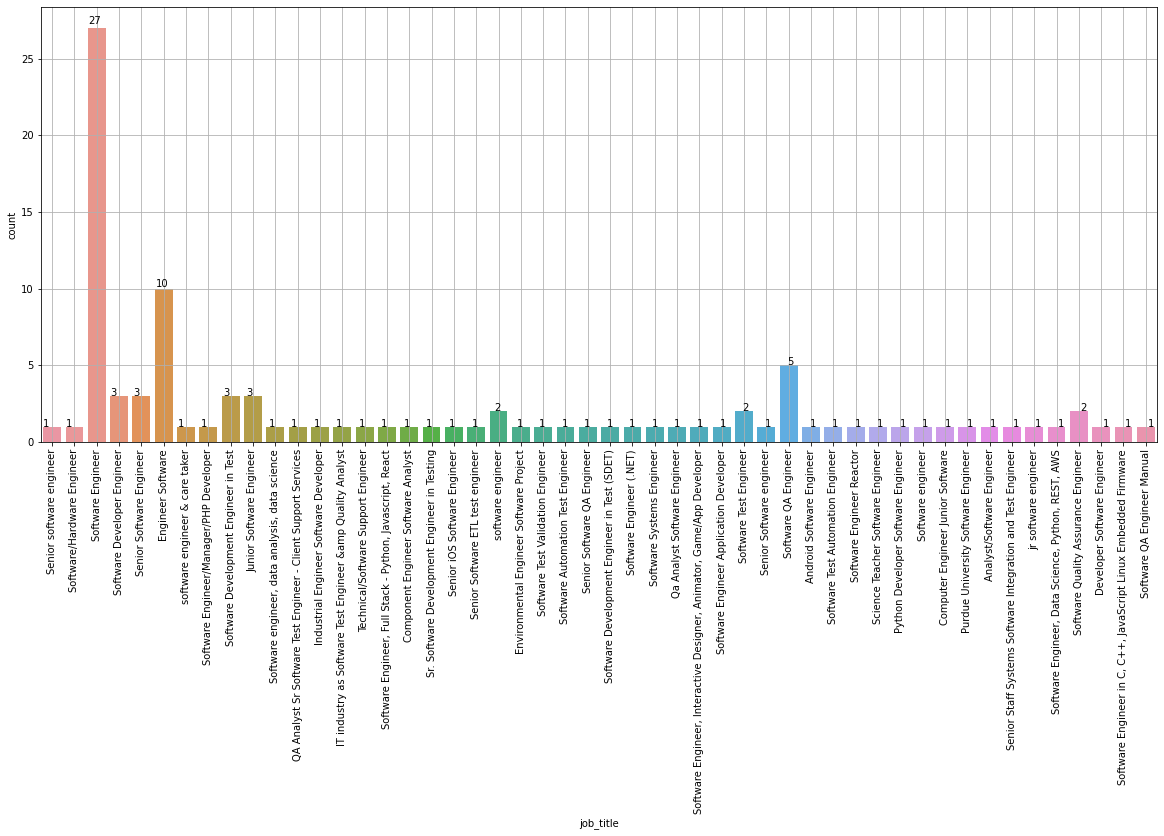

In [7]:
import seaborn as sns
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax=sns.countplot(x="job_title", data=df_soe)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()


In [8]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df_soe['cleaned_resume'] = df_soe.resume.apply(lambda x: cleanResume(x))

In [9]:
df_soe.head()

,job_title,resume,Category,cleaned_resume
0,Senior software engineer,\r\nSUMMARY\r\n\r\n●Around * years of experien...,Software Engineer,SUMMARY Around years of experience as a Full ...
1,Software/Hardware Engineer,\r\nSean Rhategan\r\n**** ******** **** **\r\n...,Software Engineer,Sean Rhategan Lakewood Ranch FL 34202 United ...
2,Software Engineer,\r\nPhone: 949-***-****\r\nE-mail: adpyq1@r.po...,Software Engineer,Phone 949 E mail adpyq1 adpyq1 Ty Leard Objec...
3,Software Developer Engineer,\r\nKylique Hairston\r\nSoftware Engineering I...,Software Engineer,Kylique Hairston Software Engineering Intern ...
4,Software Engineer,\r\nDerek Shimoda\r\n*** ****** ******\r\nDulu...,Software Engineer,Derek Shimoda Duluth MN 760 Objective Join a ...


## Tokenization

In [10]:
import nltk
import string
from nltk.tokenize import word_tokenize

In [11]:
df_soe['tokenized'] = df_soe['cleaned_resume'].apply(word_tokenize)
df_soe.head()

,job_title,resume,Category,cleaned_resume,tokenized
0,Senior software engineer,\r\nSUMMARY\r\n\r\n●Around * years of experien...,Software Engineer,SUMMARY Around years of experience as a Full ...,"[SUMMARY, Around, years, of, experience, as, a..."
1,Software/Hardware Engineer,\r\nSean Rhategan\r\n**** ******** **** **\r\n...,Software Engineer,Sean Rhategan Lakewood Ranch FL 34202 United ...,"[Sean, Rhategan, Lakewood, Ranch, FL, 34202, U..."
2,Software Engineer,\r\nPhone: 949-***-****\r\nE-mail: adpyq1@r.po...,Software Engineer,Phone 949 E mail adpyq1 adpyq1 Ty Leard Objec...,"[Phone, 949, E, mail, adpyq1, adpyq1, Ty, Lear..."
3,Software Developer Engineer,\r\nKylique Hairston\r\nSoftware Engineering I...,Software Engineer,Kylique Hairston Software Engineering Intern ...,"[Kylique, Hairston, Software, Engineering, Int..."
4,Software Engineer,\r\nDerek Shimoda\r\n*** ****** ******\r\nDulu...,Software Engineer,Derek Shimoda Duluth MN 760 Objective Join a ...,"[Derek, Shimoda, Duluth, MN, 760, Objective, J..."


## Converting to lower case

In [12]:
df_soe['lowercase'] = df_soe['tokenized'].apply(lambda x: [word.lower() for word in x])
df_soe.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase
0,Senior software engineer,\r\nSUMMARY\r\n\r\n●Around * years of experien...,Software Engineer,SUMMARY Around years of experience as a Full ...,"[SUMMARY, Around, years, of, experience, as, a...","[summary, around, years, of, experience, as, a..."
1,Software/Hardware Engineer,\r\nSean Rhategan\r\n**** ******** **** **\r\n...,Software Engineer,Sean Rhategan Lakewood Ranch FL 34202 United ...,"[Sean, Rhategan, Lakewood, Ranch, FL, 34202, U...","[sean, rhategan, lakewood, ranch, fl, 34202, u..."
2,Software Engineer,\r\nPhone: 949-***-****\r\nE-mail: adpyq1@r.po...,Software Engineer,Phone 949 E mail adpyq1 adpyq1 Ty Leard Objec...,"[Phone, 949, E, mail, adpyq1, adpyq1, Ty, Lear...","[phone, 949, e, mail, adpyq1, adpyq1, ty, lear..."
3,Software Developer Engineer,\r\nKylique Hairston\r\nSoftware Engineering I...,Software Engineer,Kylique Hairston Software Engineering Intern ...,"[Kylique, Hairston, Software, Engineering, Int...","[kylique, hairston, software, engineering, int..."
4,Software Engineer,\r\nDerek Shimoda\r\n*** ****** ******\r\nDulu...,Software Engineer,Derek Shimoda Duluth MN 760 Objective Join a ...,"[Derek, Shimoda, Duluth, MN, 760, Objective, J...","[derek, shimoda, duluth, mn, 760, objective, j..."


In [13]:
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

## Removing stop words

In [14]:
stop_words = set(stopwords.words('english'))
df_soe['stopwords_removed'] = df_soe['lowercase'].apply(lambda x: [word for word in x if word not in stop_words])
df_soe.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed
0,Senior software engineer,\r\nSUMMARY\r\n\r\n●Around * years of experien...,Software Engineer,SUMMARY Around years of experience as a Full ...,"[SUMMARY, Around, years, of, experience, as, a...","[summary, around, years, of, experience, as, a...","[summary, around, years, experience, full, sta..."
1,Software/Hardware Engineer,\r\nSean Rhategan\r\n**** ******** **** **\r\n...,Software Engineer,Sean Rhategan Lakewood Ranch FL 34202 United ...,"[Sean, Rhategan, Lakewood, Ranch, FL, 34202, U...","[sean, rhategan, lakewood, ranch, fl, 34202, u...","[sean, rhategan, lakewood, ranch, fl, 34202, u..."
2,Software Engineer,\r\nPhone: 949-***-****\r\nE-mail: adpyq1@r.po...,Software Engineer,Phone 949 E mail adpyq1 adpyq1 Ty Leard Objec...,"[Phone, 949, E, mail, adpyq1, adpyq1, Ty, Lear...","[phone, 949, e, mail, adpyq1, adpyq1, ty, lear...","[phone, 949, e, mail, adpyq1, adpyq1, ty, lear..."
3,Software Developer Engineer,\r\nKylique Hairston\r\nSoftware Engineering I...,Software Engineer,Kylique Hairston Software Engineering Intern ...,"[Kylique, Hairston, Software, Engineering, Int...","[kylique, hairston, software, engineering, int...","[kylique, hairston, software, engineering, int..."
4,Software Engineer,\r\nDerek Shimoda\r\n*** ****** ******\r\nDulu...,Software Engineer,Derek Shimoda Duluth MN 760 Objective Join a ...,"[Derek, Shimoda, Duluth, MN, 760, Objective, J...","[derek, shimoda, duluth, mn, 760, objective, j...","[derek, shimoda, duluth, mn, 760, objective, j..."


## POS

In [15]:
df_soe['pos_tags'] = df_soe['stopwords_removed'].apply(nltk.tag.pos_tag)
df_soe.head()


,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags
0,Senior software engineer,\r\nSUMMARY\r\n\r\n●Around * years of experien...,Software Engineer,SUMMARY Around years of experience as a Full ...,"[SUMMARY, Around, years, of, experience, as, a...","[summary, around, years, of, experience, as, a...","[summary, around, years, experience, full, sta...","[(summary, JJ), (around, IN), (years, NNS), (e..."
1,Software/Hardware Engineer,\r\nSean Rhategan\r\n**** ******** **** **\r\n...,Software Engineer,Sean Rhategan Lakewood Ranch FL 34202 United ...,"[Sean, Rhategan, Lakewood, Ranch, FL, 34202, U...","[sean, rhategan, lakewood, ranch, fl, 34202, u...","[sean, rhategan, lakewood, ranch, fl, 34202, u...","[(sean, JJ), (rhategan, NN), (lakewood, VBD), ..."
2,Software Engineer,\r\nPhone: 949-***-****\r\nE-mail: adpyq1@r.po...,Software Engineer,Phone 949 E mail adpyq1 adpyq1 Ty Leard Objec...,"[Phone, 949, E, mail, adpyq1, adpyq1, Ty, Lear...","[phone, 949, e, mail, adpyq1, adpyq1, ty, lear...","[phone, 949, e, mail, adpyq1, adpyq1, ty, lear...","[(phone, NN), (949, CD), (e, JJ), (mail, NN), ..."
3,Software Developer Engineer,\r\nKylique Hairston\r\nSoftware Engineering I...,Software Engineer,Kylique Hairston Software Engineering Intern ...,"[Kylique, Hairston, Software, Engineering, Int...","[kylique, hairston, software, engineering, int...","[kylique, hairston, software, engineering, int...","[(kylique, NN), (hairston, NN), (software, NN)..."
4,Software Engineer,\r\nDerek Shimoda\r\n*** ****** ******\r\nDulu...,Software Engineer,Derek Shimoda Duluth MN 760 Objective Join a ...,"[Derek, Shimoda, Duluth, MN, 760, Objective, J...","[derek, shimoda, duluth, mn, 760, objective, j...","[derek, shimoda, duluth, mn, 760, objective, j...","[(derek, NN), (shimoda, NN), (duluth, NN), (mn..."


In [16]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df_soe['wordnet_pos'] = df_soe['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df_soe.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos
0,Senior software engineer,\r\nSUMMARY\r\n\r\n●Around * years of experien...,Software Engineer,SUMMARY Around years of experience as a Full ...,"[SUMMARY, Around, years, of, experience, as, a...","[summary, around, years, of, experience, as, a...","[summary, around, years, experience, full, sta...","[(summary, JJ), (around, IN), (years, NNS), (e...","[(summary, a), (around, n), (years, n), (exper..."
1,Software/Hardware Engineer,\r\nSean Rhategan\r\n**** ******** **** **\r\n...,Software Engineer,Sean Rhategan Lakewood Ranch FL 34202 United ...,"[Sean, Rhategan, Lakewood, Ranch, FL, 34202, U...","[sean, rhategan, lakewood, ranch, fl, 34202, u...","[sean, rhategan, lakewood, ranch, fl, 34202, u...","[(sean, JJ), (rhategan, NN), (lakewood, VBD), ...","[(sean, a), (rhategan, n), (lakewood, v), (ran..."
2,Software Engineer,\r\nPhone: 949-***-****\r\nE-mail: adpyq1@r.po...,Software Engineer,Phone 949 E mail adpyq1 adpyq1 Ty Leard Objec...,"[Phone, 949, E, mail, adpyq1, adpyq1, Ty, Lear...","[phone, 949, e, mail, adpyq1, adpyq1, ty, lear...","[phone, 949, e, mail, adpyq1, adpyq1, ty, lear...","[(phone, NN), (949, CD), (e, JJ), (mail, NN), ...","[(phone, n), (949, n), (e, a), (mail, n), (adp..."
3,Software Developer Engineer,\r\nKylique Hairston\r\nSoftware Engineering I...,Software Engineer,Kylique Hairston Software Engineering Intern ...,"[Kylique, Hairston, Software, Engineering, Int...","[kylique, hairston, software, engineering, int...","[kylique, hairston, software, engineering, int...","[(kylique, NN), (hairston, NN), (software, NN)...","[(kylique, n), (hairston, n), (software, n), (..."
4,Software Engineer,\r\nDerek Shimoda\r\n*** ****** ******\r\nDulu...,Software Engineer,Derek Shimoda Duluth MN 760 Objective Join a ...,"[Derek, Shimoda, Duluth, MN, 760, Objective, J...","[derek, shimoda, duluth, mn, 760, objective, j...","[derek, shimoda, duluth, mn, 760, objective, j...","[(derek, NN), (shimoda, NN), (duluth, NN), (mn...","[(derek, n), (shimoda, n), (duluth, n), (mn, v..."


In [17]:
from nltk.stem import WordNetLemmatizer

In [18]:
wnl = WordNetLemmatizer()
df_soe['lemmatized'] = df_soe['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df_soe.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,Senior software engineer,\r\nSUMMARY\r\n\r\n●Around * years of experien...,Software Engineer,SUMMARY Around years of experience as a Full ...,"[SUMMARY, Around, years, of, experience, as, a...","[summary, around, years, of, experience, as, a...","[summary, around, years, experience, full, sta...","[(summary, JJ), (around, IN), (years, NNS), (e...","[(summary, a), (around, n), (years, n), (exper...","[summary, around, year, experience, full, stac..."
1,Software/Hardware Engineer,\r\nSean Rhategan\r\n**** ******** **** **\r\n...,Software Engineer,Sean Rhategan Lakewood Ranch FL 34202 United ...,"[Sean, Rhategan, Lakewood, Ranch, FL, 34202, U...","[sean, rhategan, lakewood, ranch, fl, 34202, u...","[sean, rhategan, lakewood, ranch, fl, 34202, u...","[(sean, JJ), (rhategan, NN), (lakewood, VBD), ...","[(sean, a), (rhategan, n), (lakewood, v), (ran...","[sean, rhategan, lakewood, ranch, fl, 34202, u..."
2,Software Engineer,\r\nPhone: 949-***-****\r\nE-mail: adpyq1@r.po...,Software Engineer,Phone 949 E mail adpyq1 adpyq1 Ty Leard Objec...,"[Phone, 949, E, mail, adpyq1, adpyq1, Ty, Lear...","[phone, 949, e, mail, adpyq1, adpyq1, ty, lear...","[phone, 949, e, mail, adpyq1, adpyq1, ty, lear...","[(phone, NN), (949, CD), (e, JJ), (mail, NN), ...","[(phone, n), (949, n), (e, a), (mail, n), (adp...","[phone, 949, e, mail, adpyq1, adpyq1, ty, lear..."
3,Software Developer Engineer,\r\nKylique Hairston\r\nSoftware Engineering I...,Software Engineer,Kylique Hairston Software Engineering Intern ...,"[Kylique, Hairston, Software, Engineering, Int...","[kylique, hairston, software, engineering, int...","[kylique, hairston, software, engineering, int...","[(kylique, NN), (hairston, NN), (software, NN)...","[(kylique, n), (hairston, n), (software, n), (...","[kylique, hairston, software, engineering, int..."
4,Software Engineer,\r\nDerek Shimoda\r\n*** ****** ******\r\nDulu...,Software Engineer,Derek Shimoda Duluth MN 760 Objective Join a ...,"[Derek, Shimoda, Duluth, MN, 760, Objective, J...","[derek, shimoda, duluth, mn, 760, objective, j...","[derek, shimoda, duluth, mn, 760, objective, j...","[(derek, NN), (shimoda, NN), (duluth, NN), (mn...","[(derek, n), (shimoda, n), (duluth, n), (mn, v...","[derek, shimoda, duluth, mn, 760, objective, j..."


### Checking the right fit based on the job description score will be predicted

In [19]:
import docx2txt

In [20]:
job_desc = docx2txt.process("job_descp_soe.docx")
print(job_desc)

The software engineer job description starts with background requirements. Someone looking to get into this role will need a bachelor’s degree in software, math, or science. Applicants would also be expected to have broad experience with computer systems and applications such as C++ or Java. 

Depending on the specific scope of the role, the skills required will vary, but employers will look for candidates who can offer strategic problem solving, strong analytical skills, collaboration, adaptability, a willingness to learn, innovation, and communication.


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
def skill_check(text_df):
    text = [text_df,job_desc]
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(text)
    match = cosine_similarity(count_matrix)[0][1]
    match = match*100
    match = round(match,2)
    match = match+20
    return match

df_soe['Right_fit_Score'] = df_soe.cleaned_resume.apply(lambda x: skill_check(x))

    
df_soe.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos,lemmatized,Right_fit_Score
0,Senior software engineer,\r\nSUMMARY\r\n\r\n●Around * years of experien...,Software Engineer,SUMMARY Around years of experience as a Full ...,"[SUMMARY, Around, years, of, experience, as, a...","[summary, around, years, of, experience, as, a...","[summary, around, years, experience, full, sta...","[(summary, JJ), (around, IN), (years, NNS), (e...","[(summary, a), (around, n), (years, n), (exper...","[summary, around, year, experience, full, stac...",58.26
1,Software/Hardware Engineer,\r\nSean Rhategan\r\n**** ******** **** **\r\n...,Software Engineer,Sean Rhategan Lakewood Ranch FL 34202 United ...,"[Sean, Rhategan, Lakewood, Ranch, FL, 34202, U...","[sean, rhategan, lakewood, ranch, fl, 34202, u...","[sean, rhategan, lakewood, ranch, fl, 34202, u...","[(sean, JJ), (rhategan, NN), (lakewood, VBD), ...","[(sean, a), (rhategan, n), (lakewood, v), (ran...","[sean, rhategan, lakewood, ranch, fl, 34202, u...",66.74
2,Software Engineer,\r\nPhone: 949-***-****\r\nE-mail: adpyq1@r.po...,Software Engineer,Phone 949 E mail adpyq1 adpyq1 Ty Leard Objec...,"[Phone, 949, E, mail, adpyq1, adpyq1, Ty, Lear...","[phone, 949, e, mail, adpyq1, adpyq1, ty, lear...","[phone, 949, e, mail, adpyq1, adpyq1, ty, lear...","[(phone, NN), (949, CD), (e, JJ), (mail, NN), ...","[(phone, n), (949, n), (e, a), (mail, n), (adp...","[phone, 949, e, mail, adpyq1, adpyq1, ty, lear...",54.16
3,Software Developer Engineer,\r\nKylique Hairston\r\nSoftware Engineering I...,Software Engineer,Kylique Hairston Software Engineering Intern ...,"[Kylique, Hairston, Software, Engineering, Int...","[kylique, hairston, software, engineering, int...","[kylique, hairston, software, engineering, int...","[(kylique, NN), (hairston, NN), (software, NN)...","[(kylique, n), (hairston, n), (software, n), (...","[kylique, hairston, software, engineering, int...",51.49
4,Software Engineer,\r\nDerek Shimoda\r\n*** ****** ******\r\nDulu...,Software Engineer,Derek Shimoda Duluth MN 760 Objective Join a ...,"[Derek, Shimoda, Duluth, MN, 760, Objective, J...","[derek, shimoda, duluth, mn, 760, objective, j...","[derek, shimoda, duluth, mn, 760, objective, j...","[(derek, NN), (shimoda, NN), (duluth, NN), (mn...","[(derek, n), (shimoda, n), (duluth, n), (mn, v...","[derek, shimoda, duluth, mn, 760, objective, j...",66.84


In [23]:
df_soe['Right_fit_Score'].max()

71.38

In [24]:
skill = docx2txt.process("skill_sofe.docx")
print(skill)

Java, Python, C#/.Net, Mean, Ruby ,Software testing, Object-oriented design (OOD), Software development, Team player, Problem solving , Communication skills, Attention to detail


In [25]:
def skill_check(text_df):
    text = [text_df,skill]
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(text)
    match = cosine_similarity(count_matrix)[0][1]
    match = match*100
    match = round(match,2)
    match = match+40
    return match

df_soe['skill_fit_Score'] = df_soe.cleaned_resume.apply(lambda x: skill_check(x))

    
df_soe.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos,lemmatized,Right_fit_Score,skill_fit_Score
0,Senior software engineer,\r\nSUMMARY\r\n\r\n●Around * years of experien...,Software Engineer,SUMMARY Around years of experience as a Full ...,"[SUMMARY, Around, years, of, experience, as, a...","[summary, around, years, of, experience, as, a...","[summary, around, years, experience, full, sta...","[(summary, JJ), (around, IN), (years, NNS), (e...","[(summary, a), (around, n), (years, n), (exper...","[summary, around, year, experience, full, stac...",58.26,50.87
1,Software/Hardware Engineer,\r\nSean Rhategan\r\n**** ******** **** **\r\n...,Software Engineer,Sean Rhategan Lakewood Ranch FL 34202 United ...,"[Sean, Rhategan, Lakewood, Ranch, FL, 34202, U...","[sean, rhategan, lakewood, ranch, fl, 34202, u...","[sean, rhategan, lakewood, ranch, fl, 34202, u...","[(sean, JJ), (rhategan, NN), (lakewood, VBD), ...","[(sean, a), (rhategan, n), (lakewood, v), (ran...","[sean, rhategan, lakewood, ranch, fl, 34202, u...",66.74,53.09
2,Software Engineer,\r\nPhone: 949-***-****\r\nE-mail: adpyq1@r.po...,Software Engineer,Phone 949 E mail adpyq1 adpyq1 Ty Leard Objec...,"[Phone, 949, E, mail, adpyq1, adpyq1, Ty, Lear...","[phone, 949, e, mail, adpyq1, adpyq1, ty, lear...","[phone, 949, e, mail, adpyq1, adpyq1, ty, lear...","[(phone, NN), (949, CD), (e, JJ), (mail, NN), ...","[(phone, n), (949, n), (e, a), (mail, n), (adp...","[phone, 949, e, mail, adpyq1, adpyq1, ty, lear...",54.16,56.52
3,Software Developer Engineer,\r\nKylique Hairston\r\nSoftware Engineering I...,Software Engineer,Kylique Hairston Software Engineering Intern ...,"[Kylique, Hairston, Software, Engineering, Int...","[kylique, hairston, software, engineering, int...","[kylique, hairston, software, engineering, int...","[(kylique, NN), (hairston, NN), (software, NN)...","[(kylique, n), (hairston, n), (software, n), (...","[kylique, hairston, software, engineering, int...",51.49,71.33
4,Software Engineer,\r\nDerek Shimoda\r\n*** ****** ******\r\nDulu...,Software Engineer,Derek Shimoda Duluth MN 760 Objective Join a ...,"[Derek, Shimoda, Duluth, MN, 760, Objective, J...","[derek, shimoda, duluth, mn, 760, objective, j...","[derek, shimoda, duluth, mn, 760, objective, j...","[(derek, NN), (shimoda, NN), (duluth, NN), (mn...","[(derek, n), (shimoda, n), (duluth, n), (mn, v...","[derek, shimoda, duluth, mn, 760, objective, j...",66.84,58.89


In [26]:
df_soe['skill_fit_Score'].max()

78.38